In [1]:
import tensorflow
import keras

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [3]:
inp1 = Input(shape=(11,))
inp2 = Input(shape=(5,))

In [4]:
h1 = Dense(16, activation='relu')(inp1)
h2 = Dense(4, activation='relu')(h1)

h3 = Dense(4, activation='tanh')(inp2)

In [5]:
out1 = Dense(4, activation='softmax')(h2)
out2 = Dense(1, activation='softmax')(h3)

In [6]:
model = Model(inputs=[inp1, inp2], outputs=[out1, out2], name = "Model1")

In [7]:
model.summary()

Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │        192 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │         68 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │         24 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │         20 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │          5 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

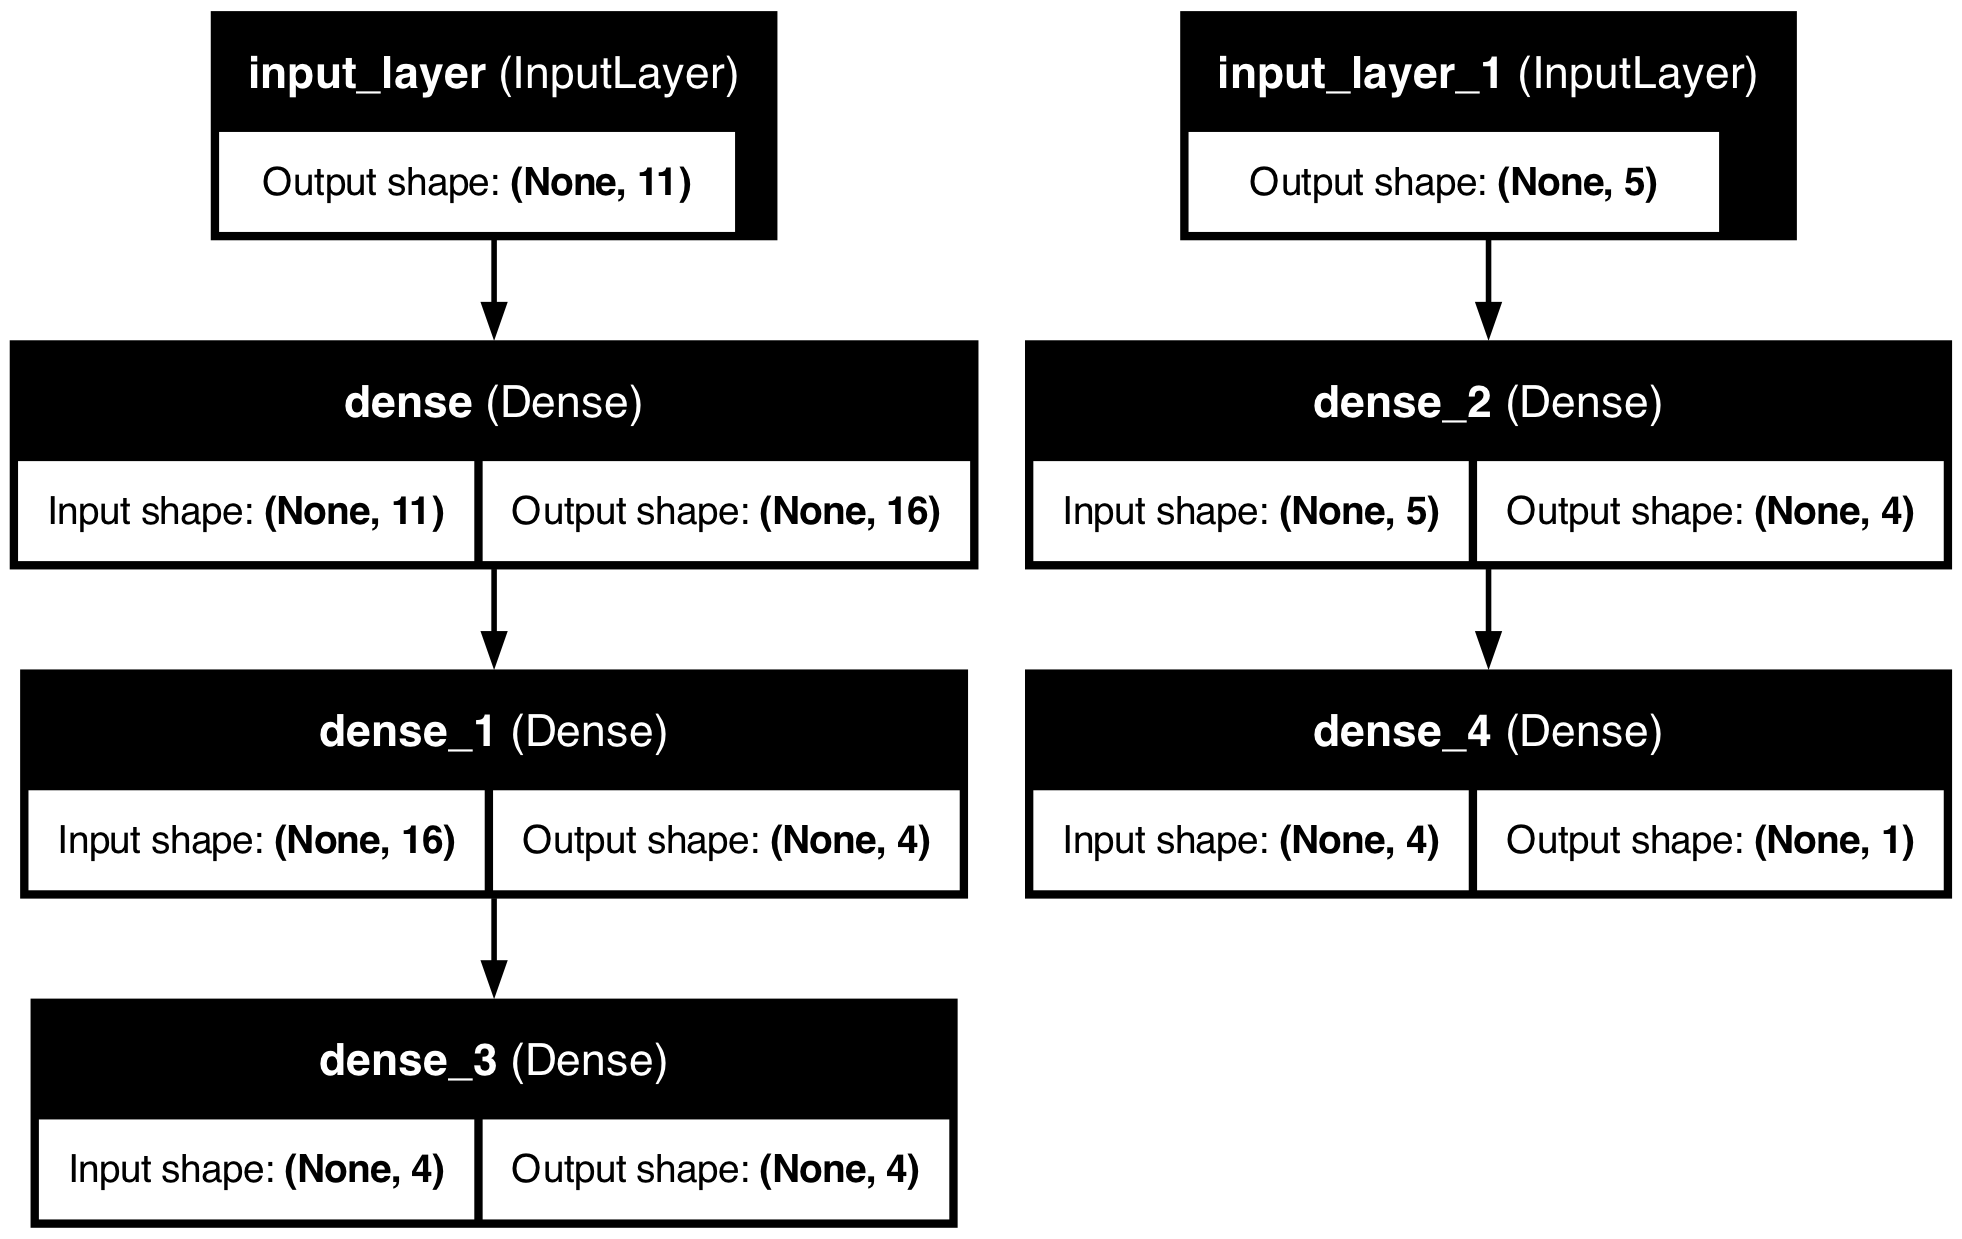

In [8]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [9]:
model.compile(loss = {'out1': 'sparsecategoricalcrossentropy', 'out2': 'mse'}, optimizer = 'adam')